In [ ]:
# Subject : California is one of the biggest states in America and there are many counties in it. 
# Especially LA is notorioius for the bad traffic but north california is getting impacted by influx of people working for tech indutry.
# We will examine the traffic accident by counties and see if we can find anything interesting! 

In [1]:
## Load the packages
#1.1
## Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#1.2
## Read in the data and inspect again
import pandas as pd
df = pd.read_csv("C:/Users/eymoo/Documents/US_Accidents_Dec20.csv")
df.head()
# California has 972K cases which is enough for analysis. We will grab only California data and will use it for the analysis. 
cal = df.loc[df['State'] == 'CA']

In [3]:
#Let's find out number of accidents by county
tt=cal.groupby('County')['ID'].count().sort_values(ascending=False)

Text(0.5, 1.0, 'Number of Accidents by County')

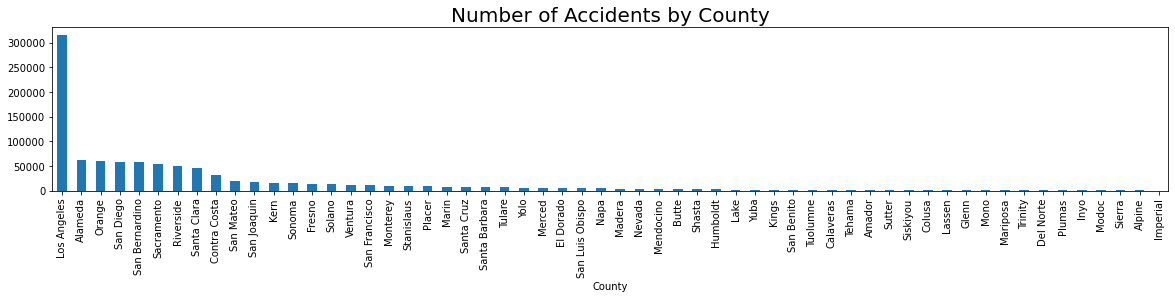

In [21]:
#Let's visually examine which county has most of the car accident
plt.figure(figsize=(20, 3))
tt.plot(kind="bar")
plt.title('Number of Accidents by County', fontdict = {'fontsize' : 20})
# LA is the worst!

In [5]:
# Then would the population be same pattern? 
# Load the population data scraped from wikipedia

pop = pd.read_csv("C:/Users/eymoo/Documents/Traffic Accident/cal_county_population.csv",index_col='CTYNAME')
#pop.head(2)

Text(0.5, 1.0, 'Number of Population by County')

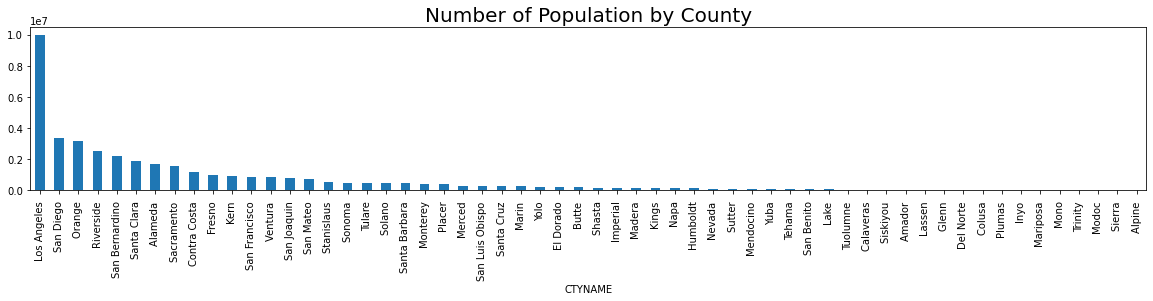

In [20]:
plt.figure(figsize=(20, 3))
pop['pop2021'].plot(kind="bar")
plt.title('Number of Population by County', fontdict = {'fontsize' : 20})

# LA has most of the population but the order is not exactly align with number of accidents

In [ ]:
## Ended up manually joining outside of Jupyter :( ##

In [166]:
ttt.to_csv("C:/Users/eymoo/Documents/Traffic Accident/accident_sample.csv",index=False)

In [7]:
#Expect joined datasest
import pandas as pd
test = pd.read_csv("C:/Users/eymoo/Documents/Traffic Accident/test.csv",sep='\t\t')
#test.head()

<ipython-input-7-016a01a75ae0>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv("C:/Users/eymoo/Documents/Traffic Accident/test.csv",sep='\t\t')


In [168]:
test.describe()

,pop2021,GrowthRate,popDensity,accident,accident_pop_%
count,5.800000e+01,58.000000,58.000000,58.000000,58.000000
mean,6.829913e+05,3.652397,924.094364,16768.706897,0.026591
std,1.462337e+06,6.848149,1978.557888,43521.886447,0.016609
min,1.209000e+03,-14.787400,1.635800,98.000000,0.000543
25%,4.840425e+04,-0.194550,65.491475,1207.750000,0.017492
50%,1.888510e+05,4.054600,255.517400,4034.500000,0.023899
75%,7.106998e+05,8.461625,961.584200,13133.500000,0.031529
max,9.969510e+06,17.966000,13488.851300,314901.000000,0.126551


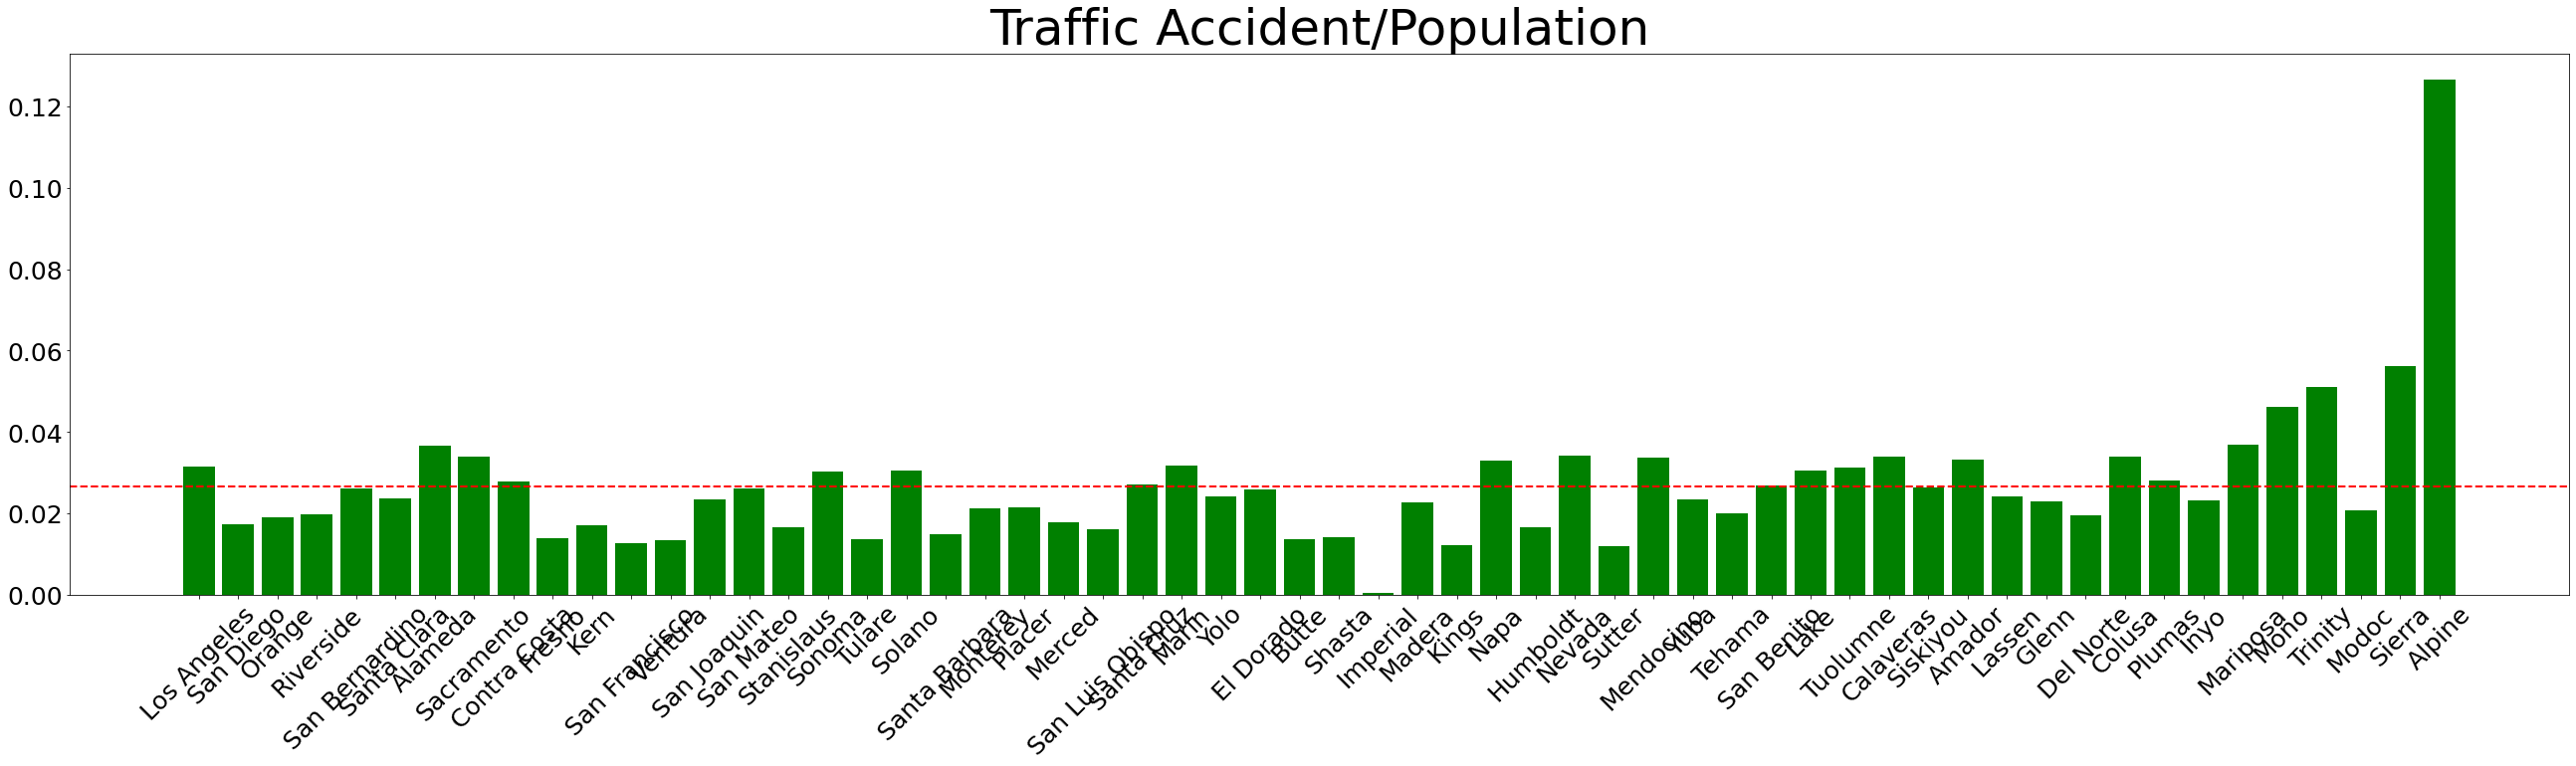

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(45, 10))
plt.bar(test['CTYNAME'], test['accident_pop_%'], color='green')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)
plt.title('Traffic Accident/Population', fontdict = {'fontsize' : 50})
plt.axhline(test['accident_pop_%'].mean(), color='red', linestyle='dashed', linewidth=2)

In [26]:

# Interesting enough Counties like Santa Clara, San Francisco and San Mateo area where alot of tech companies 
# are located doesn't have higher accident/population rate. Their accident rate was about the average value of across the county.

# One thing interesting is "Imperial" county's accident rate is extremely low. Based on the research, this county has big land 
#for the agriculture and it can be assumed that they are less likely to have very congested road structure.

# The other interesting part was Sierra and Alpine. These county has very small population which contribute higher accident 
#per capita rate but it's also true that majority of this county's area is covered by mountains, creeks and not very good 
#infrastructure is built for this area. 


test.sort_values('accident_pop_%')

,CTYNAME,pop2021,GrowthRate,popDensity,accident,accident_pop_%
30,Imperial,180599,3.3672,244.3523,98,0.000543
36,Sutter,98217,3.6580,132.8886,1163,0.011841
32,Kings,156056,2.4191,211.1454,1890,0.012111
11,San Francisco,883255,9.6523,1195.0533,11161,0.012636
12,Ventura,841734,2.0164,1138.8749,11302,0.013427
17,Tulare,469407,5.9684,635.1126,6365,0.013560
28,Butte,196880,-10.4883,266.3807,2670,0.013562
9,Fresno,1013400,8.7294,1371.1408,14176,0.013989
29,Shasta,180822,2.0014,244.6541,2579,0.014263
19,Santa Barbara,447937,5.5880,606.0634,6650,0.014846
